<a href="https://colab.research.google.com/github/Bennykillua/08-weather-conditions/blob/master/data/EDA_and_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

[link text](https://) Importing the csv file: The link was gotten from the raw format offered by GitHub.

In [39]:
weatherdf = pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Summary%20of%20Weather.csv")

In [40]:
locationdf =  pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Weather%20Station%20Locations.csv")

In [41]:
locationdf.head(3)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667


In [42]:
locationdf.isna().sum()

WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

In [43]:
weatherdf.head(3)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Data by Feature')

,Total,Percent
WTE,119040,1.0
ITH,119040,1.0
RVG,119040,1.0
FB,119040,1.0
FTI,119040,1.0


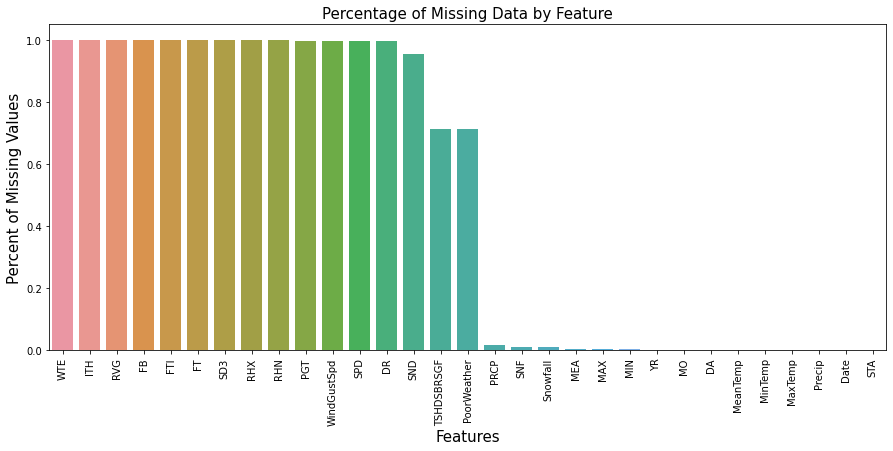

In [44]:
total = weatherdf.isnull().sum().sort_values(ascending=False)
percent = (weatherdf.isnull().sum()/weatherdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

Dropping all column with more than 80% NAN

also will be dropping the TSHDSBR2GF because it is the same as the Poor weather column according to the kaggle description


---



In [45]:
weatherdf.drop(["DR", 'SPD','WindGustSpd', 'PGT', "TSHDSBRSGF",'RHN', 'RHX', "SND", 'SD3', "FT", "FTI", "FB", 'RVG', 'ITH', 'WTE'], 
                    axis =1 , inplace=True)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Data by Feature')

,Total,Percent
PoorWeather,84803,0.712391
PRCP,1932,0.016230
SNF,1163,0.009770
Snowfall,1163,0.009770
MEA,498,0.004183


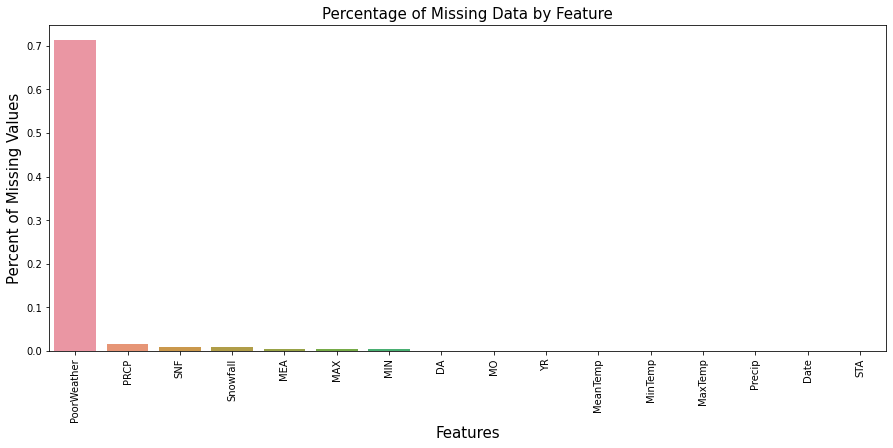

In [46]:
total = weatherdf.isnull().sum().sort_values(ascending=False)
percent = (weatherdf.isnull().sum()/weatherdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

the Kaggle dataset was taken from https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data 

From the description:

MAX MAXIMUM TEMPERATURE FAHRENHEIT

MIN MINIMUM TEMPERATURE FAHRENHEIT

MEA MEAN TEMPERATURE FAHRENHEIT

which is similar to

MaxTemp MAXIMUM TEMPERATURE Celsius

MinTemp MINIMUM TEMPERATURE Celsius

MeanTemp MEAN TEMPERATURE Celsius

hence we would drop MAX, MIN and MEA 

In [47]:
weatherdf.drop(["MIN", "MAX", "MEA"], axis =1 , inplace=True)

In [48]:
weatherdf.isna().sum()

STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall        1163
PoorWeather    84803
YR                 0
MO                 0
DA                 0
PRCP            1932
SNF             1163
dtype: int64

we cant drop nan since we are dealin with time, it could cause a
gap in the dataset, hence we need another alternative.


For the nan in PRCP, SNF and Snowfall, which is less than 10%, we would just use the pervious value data.
Why? based on what we know, weather in the same period are usually the same as yesterday 80% of the time. 
Just a logical and reasonable guess


In [49]:
weatherdf.Snowfall = pd.DataFrame(weatherdf.Snowfall.fillna(method="bfill",axis=0).fillna(0))

we could also drop PRCP and SNF because it is simlar to Precip and Snowfall

PRCP          24-HOUR PRECIPITATION      INCHES & HUNDREDTHS

SNF            SNOWFALL (INCLUDES         INCHES & TENTHS
               ICE PELLETS)
               
based on https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data 


In [50]:
weatherdf.drop(["PRCP", "SNF"], axis =1 , inplace=True)

From description, Poor weather was judged based on a numbers of factors;
Poor Weather
TSHDSBRSGF     DAY WITH:  THUNDER         0 = NO
                          SLEET           1 = YES
                          HAIL
                          DUST OR SAND
                          SMOKE OR HAZE
                          BLOWING SNOW
                          RAIN
                          SNOW
                          GLAZE
                          FOG
                        
                          
                   thus if snowfall == 0 the poor weather is 0

In [51]:
weatherdf["PoorWeather"] = np.where(weatherdf['Snowfall']!= 0, 1, 0)
weatherdf.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,0,42,7,1
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,0,42,7,2
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,0,42,7,3
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,0,42,7,4
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,0,42,7,5


In [52]:
weatherdf.isna().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
PoorWeather    0
YR             0
MO             0
DA             0
dtype: int64

In [53]:
#saving the cleaned file as a new CSV
weatherdf.to_csv('Cleanedweathersummary.csv', index=False)
locationdf.to_csv('CleanedstationLocationtest_data.csv', index=False)